Enter the neighborhood of all the graph vertices:  {"a":["b","c"],"b":["c","a"],"c":["b","a"]}



 Independent sets for the graph G is/are -  [set(), {'c'}, {'b'}, {'a'}] 

 
3 x + 1  is the Independence Polynomial for the graph G

 Independence number α(G) is 2

 Dominating sets for the graph G is/are -  [('a',), ('b',), ('c',), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('a', 'b', 'c')] 

   3     2
1 x + 3 x + 3 x  is the Domination Polynomial for the graph G

 Domination number γ(G) is 1


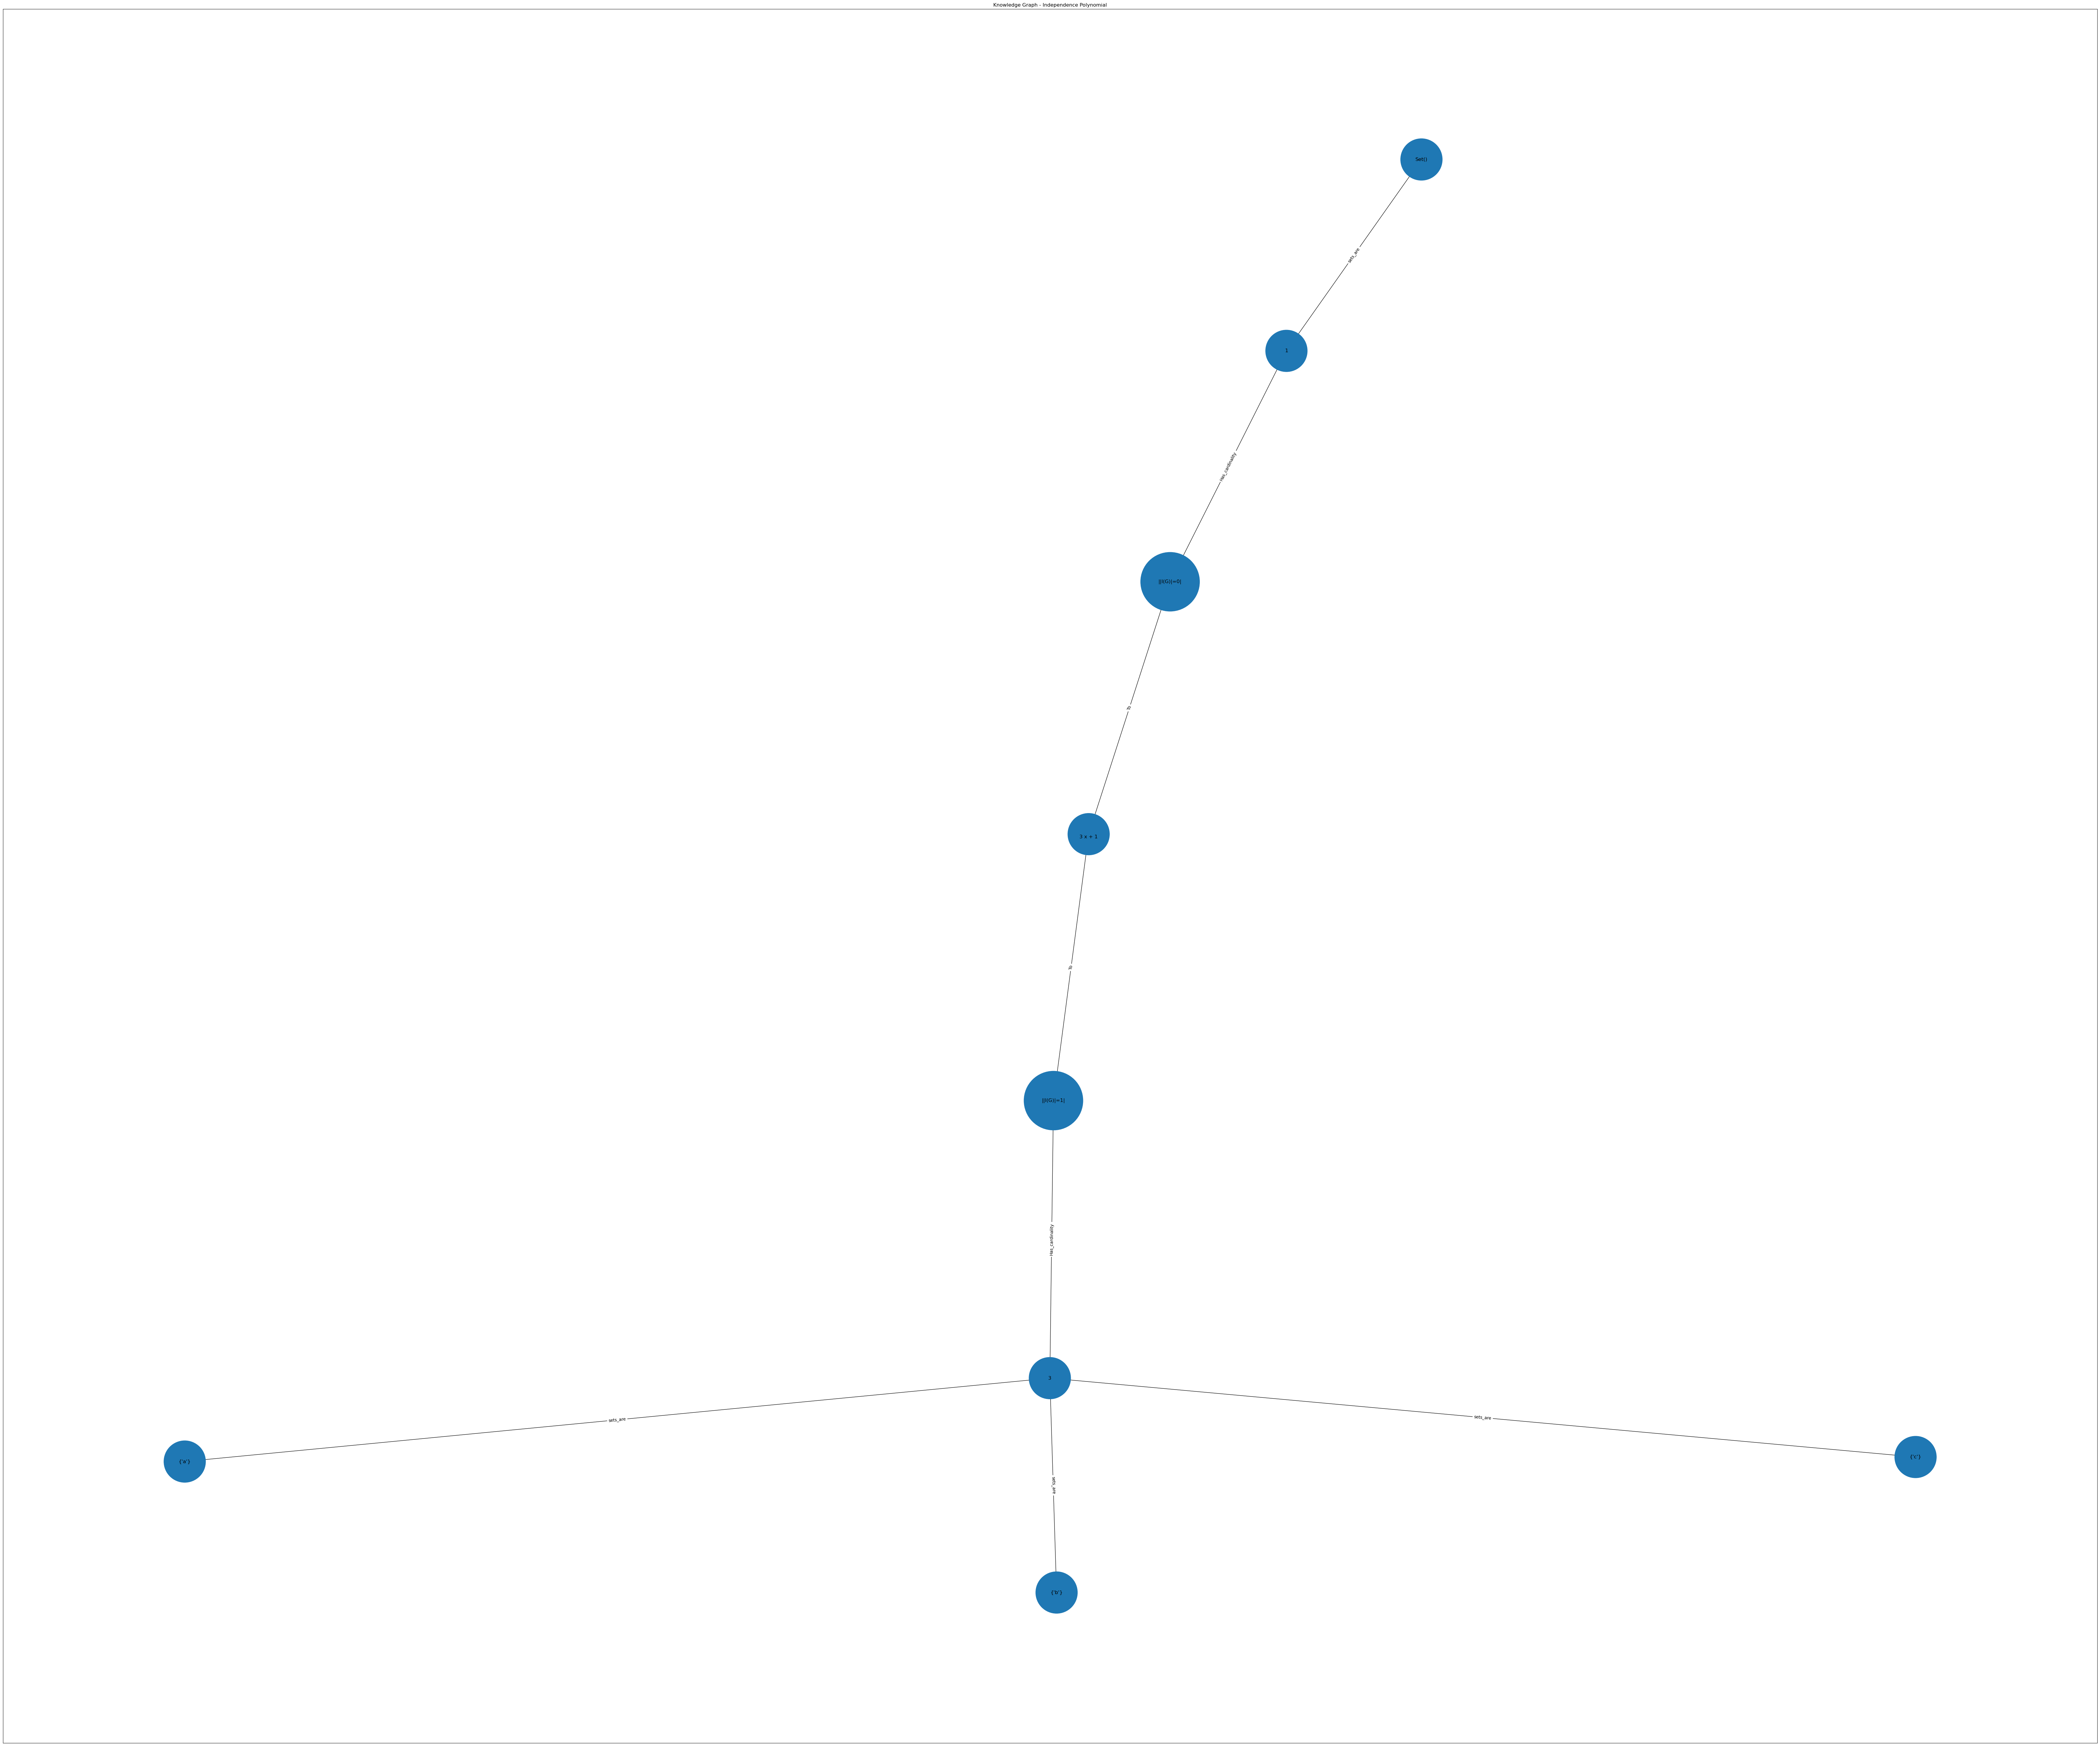

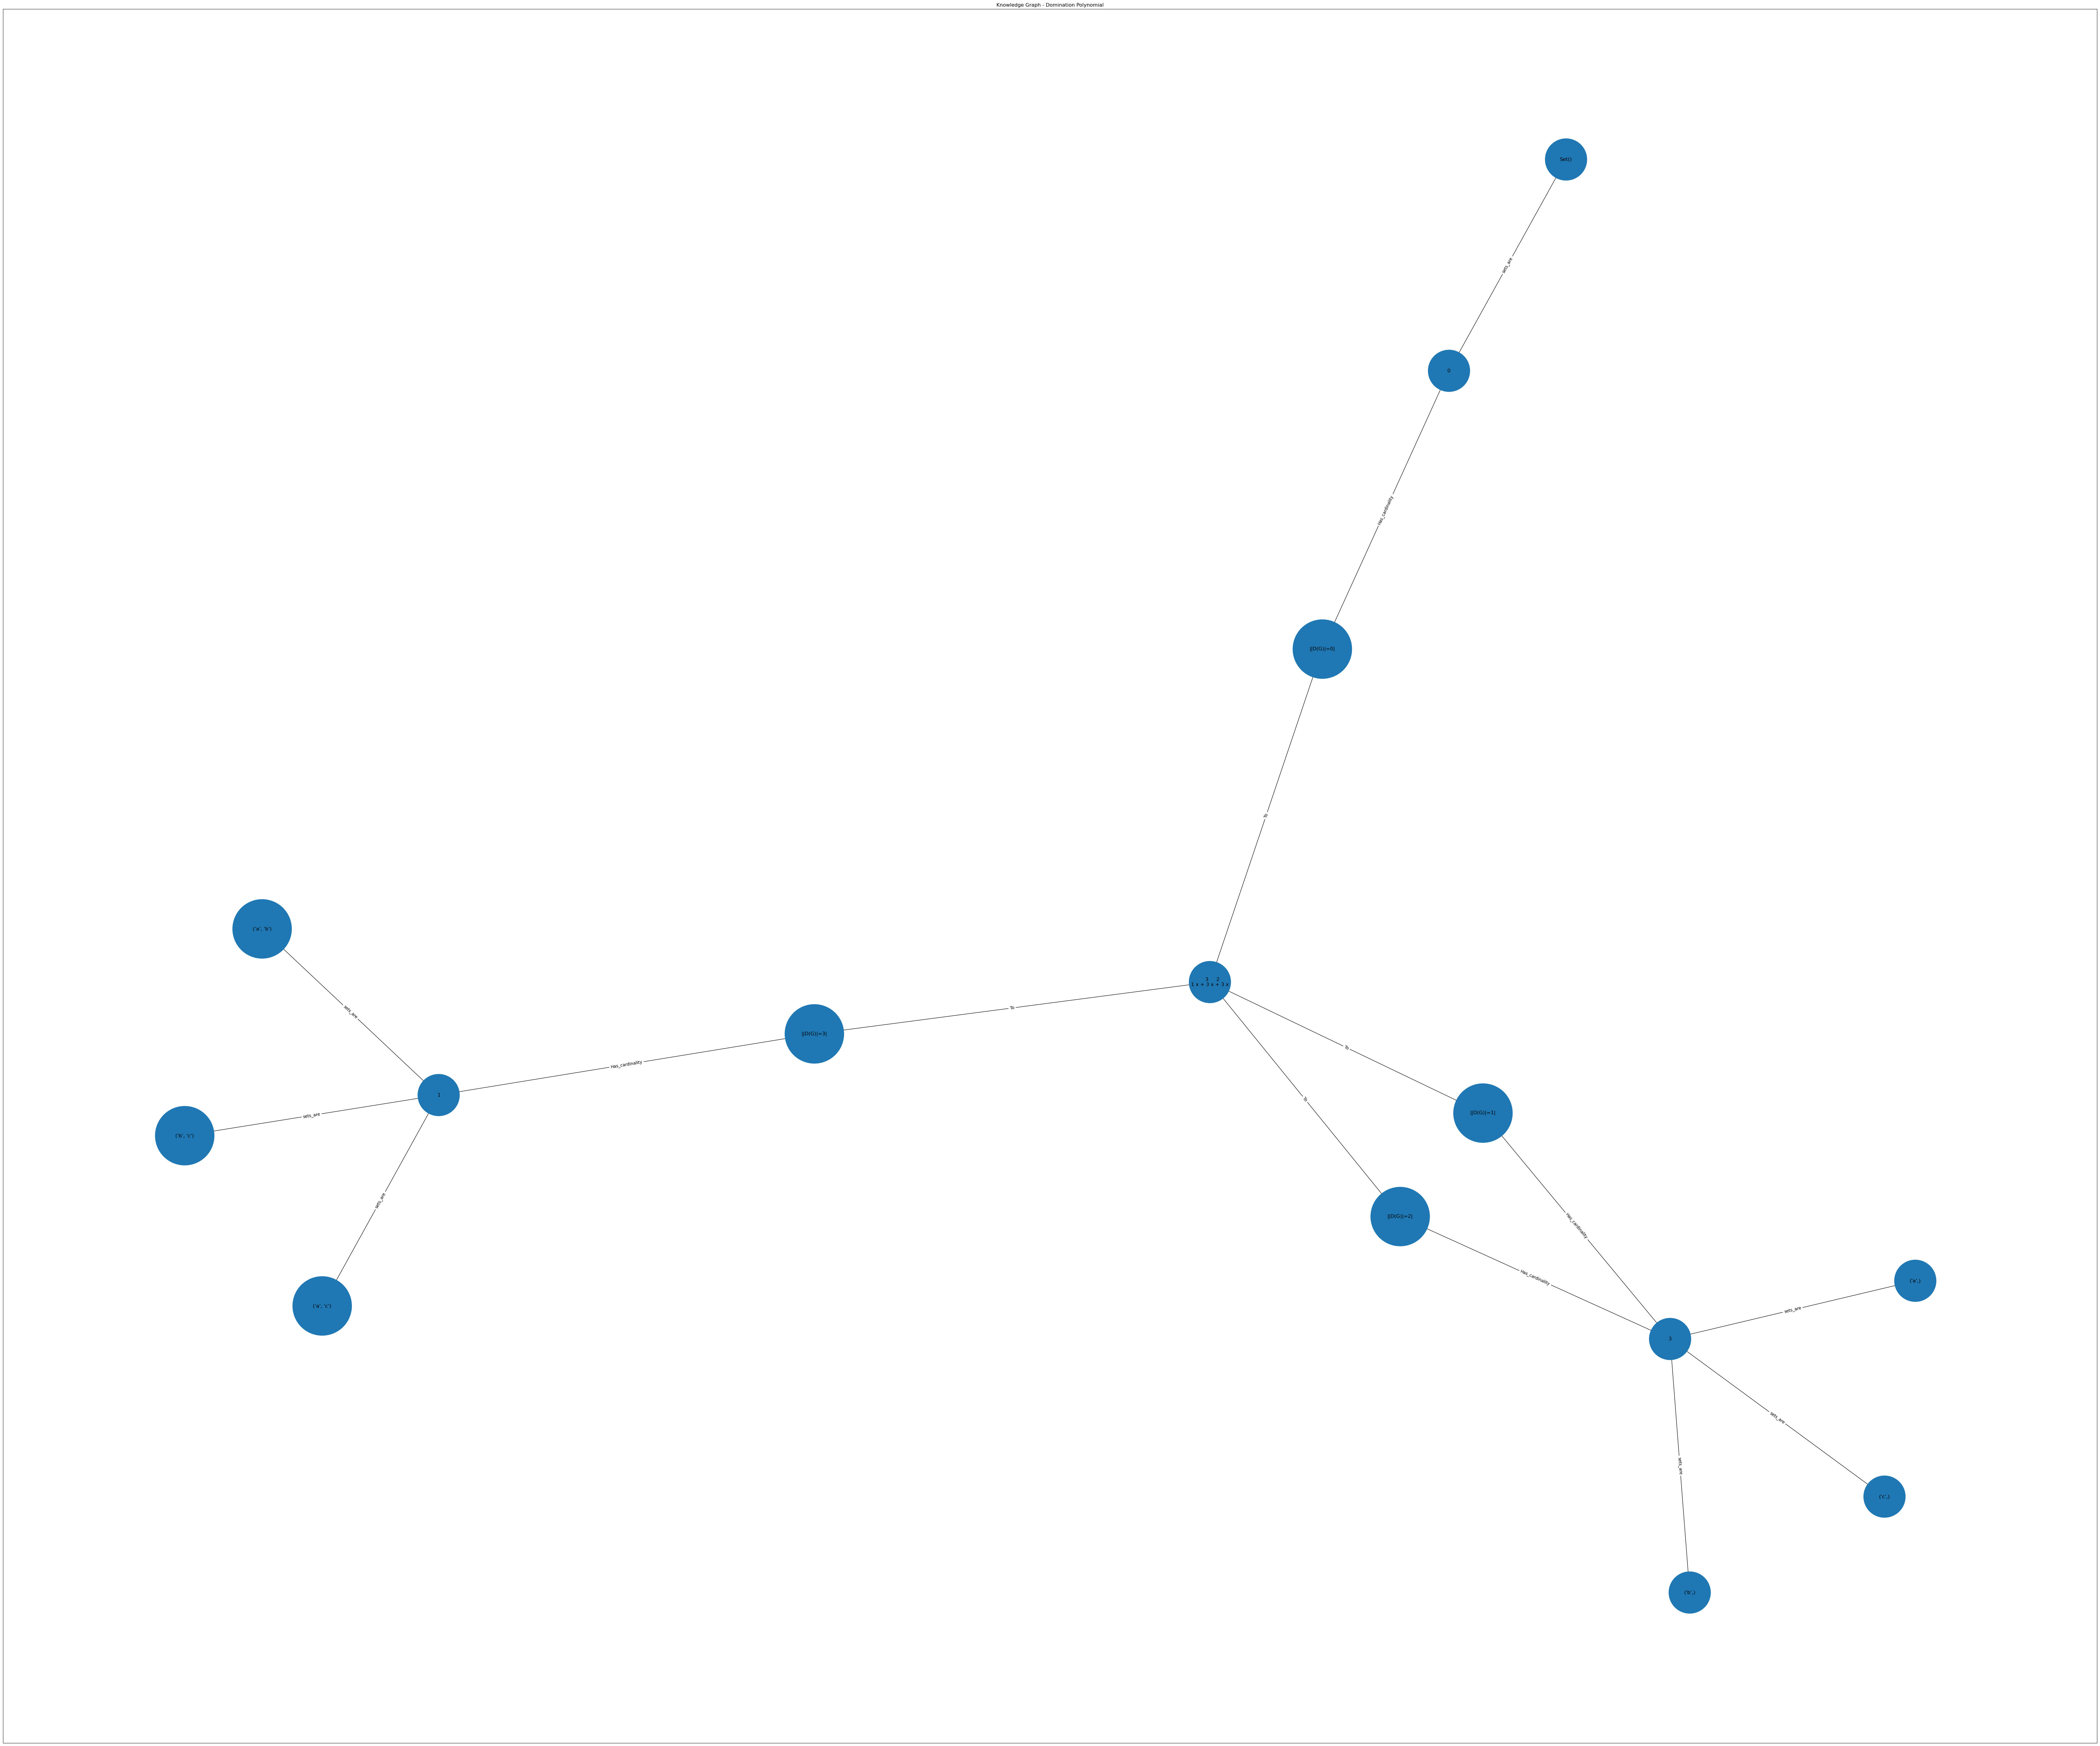

In [1]:
"author : Mehul Bafna"

from itertools import combinations
from collections import Counter
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import math

class Polynomials:
    
    def __init__(self,graph):
        self.graph = graph
    
    # Function for computing neighbourhood of vertex subsets of the vertex set   
    def neighborhood(vertices,edges):
        M = []
        for vertex in vertices:
            L = []
            for edge in edges:
                if vertex in edge:
                    L.append(edge[0])
                    L.append(edge[1])
                    M.append((vertex,L))
            neighbors = []
                    
        for i in M:
            i[1].sort()
            neighbors.append((i[0],list(Counter(i[1]))))
        return dict(neighbors)
            
    #For computing proper subsets of a set
    def proper_subset(a,b):
        if a.issubset(b):
            if len(a)!=len(b):
                return True
            else:
                return False
        else:
            return False
        
        #For computing independence polynomial of null graph, empty graph and simple connected graph
    def ind_poly(self):
        
    
        vertices = []
        edges = []
        
        # For creating a list of vertices and edges
        for node,neighbors in self.graph.items():
            for i in range(0,len(neighbors)):
                if {node,neighbors[i]} not in edges and {neighbors[i],node} not in edges:
                    edges.append({node,neighbors[i]})       
            vertices.append(node) 
            
        # Sorting the vertex set in descending order   
        vertices.sort()
        vertices.reverse()
        
        if len(edges)==0:
            #For Null Graph
            if len(vertices)==1:
                if vertices == ['']:
                    print('\n Independent sets for the graph G is/are - ','\u03A6','\n')
                    print('1 is the Independence Polynomial for the graph G')
                    '''G = nx.Graph()
                    G.add_nodes_from(vertices)
                    G.add_edges_from(edges)
                    nx.draw(G,with_labels=True)
                    plt.title('G = (V,E)')
                    plt.show'''
                    return '\n Independence number \u03B1(G) is zero'
                #For empty graph with one vertex
                else:
                    '''G = nx.Graph()
                    G.add_nodes_from(vertices)
                    G.add_edges_from(edges)
                    nx.draw(G,with_labels=True)
                    plt.title('G = (V,E)')
                    plt.show'''
                    #For Empty Graph with one vertex
                    L = [0]*(len(vertices))
                    L.append(1)
                    L.reverse()
                    print('\nIndependent sets for the graph G are- ','\u03A6 and ',set(str(vertices[0])),'\n')
                    print('1+x is the Independence Polynomial for the graph G')
                    return '\n Independence number \u03B1(G) is 1'
            #For Empty Graphs with more than one vertex
            else:
                L = [0]*(len(vertices)+1)
                for i in range(0,len(vertices)+1):
                    L[i]=math.comb(len(vertices),i)
                Indep_sets = []
                for i in range(0,len(vertices)+1):
                    Indep_sets.append(list(combinations(vertices,i)))
                Indepe_sets = []
                for i in Indep_sets:
                    for j in i:
                        Indepe_sets.append(set(j))
                print('\n Independent sets for the graph G is/are - ',Indepe_sets,'\n')
                print(np.poly1d(L),' is the Independence Polynomial for the graph G')
                '''G = nx.Graph()
                G.add_nodes_from(vertices)
                G.add_edges_from(edges)
                nx.draw(G,with_labels=True)
                plt.title('G = (V,E)')
                plt.show'''
                return '\n Independence number \u03B1(G) is '+str(len(vertices))
        #For simple connected graphs
        else:
            # Creating a powerset of vertex set in form of nested list tuples
            power_set_list = []
            for i in range(0,len(vertices)+1):
                power_set_list.append(list(combinations(vertices,i)))
              
            # For fetching the tuples and storing in a list from the above nested list power_set_list
            power_set = []
            for i in power_set_list:
                for j in i:
                    power_set.append(set(j))
                    
            ind_set = []        
            for i in power_set[0:1+len(vertices)+int(len(vertices)*(len(vertices)-1)/2)]:
                if i not in edges:
                    ind_set.append(i)
            
            #Computation of independent sets along with computation of independence polynomial        
            ind = []
            ind.append(1)
            ind.append(len(vertices))
            ind.append(int(len(vertices)*(len(vertices)-1)/2)-len(edges))
            
            for i in range(3,len(vertices)):
                m = 0
                for Set in power_set[1+len(vertices)+int(len(vertices)*(len(vertices)-1)/2):len(power_set)]:
                    count = 0
                    for edge in edges:
                        if Polynomials.proper_subset(edge,Set)==False:
                            count+=1
                            continue
                        else:
                            count = 0
                            break
                    if count == len(edges):
                        if len(Set)==i:
                            ind_set.append(Set)
                            m+=1
                if m>0:
                    ind.append(m)  
            
            Ind = ind
            ind.reverse()
            
            pol = np.poly1d(ind)
            print('\n Independent sets for the graph G is/are - ',ind_set,'\n')
            print(np.poly1d(ind),' is the Independence Polynomial for the graph G')
            print('\n Independence number \u03B1(G) is '+str(len(Ind)-1))
            
            #For drawing the original graph with vertex and edge set
        '''G = nx.Graph()
        G.add_nodes_from(vertices)
        G.add_edges_from(edges)
        nx.draw(G,with_labels=True)
        plt.title('G = (V,E)')
        plt.show'''
        
        #For computation of independence number
        
        for i in Ind:
            if i == 0:
                Ind.remove(i)
        
        ind.reverse()
        Ind_set = []
        for tot in range(len(ind_set[-1])+1):
            inde=[]
            for x in ind_set:
                if tot==len(x):
                    inde.append(x)
            Ind_set.append(inde)
                    
            
        return ind,Ind_set,pol
       
    def dom_poly(self):
    
        unsorted_edges = []
        vertices = []
        edges = []
        
        # For creating a list of vertices and ordered pair of edges
        for node,neighbors in self.graph.items():
            for i in range(0,len(neighbors)):
                if (node,neighbors[i]) not in unsorted_edges and (neighbors[i],node) not in unsorted_edges:
                    unsorted_edges.append((node,neighbors[i]))       
            vertices.append(node) 
            
        #  Updating edge set with sorted unordered pair of edges  
        for unsorted_edge in unsorted_edges:
            L = list(unsorted_edge)
            L.sort()
            edges.append(tuple(L))
            
        # Sorting the vertex set   
        vertices.sort()
        
        if len(edges)==0:
            if len(vertices)==1:
                #For Null Graph
                if vertices == ['']:
                    print('\n Dominating sets for the graph G is/are - ','\u03A6','\n')
                    print('Zero is the Domination Polynomial for the graph G')
                    '''G = nx.Graph()
                    G.add_nodes_from(vertices)
                    G.add_edges_from(edges)
                    nx.draw(G,with_labels=True)
                    plt.title('G = (V,E)')
                    plt.show'''
                    return '\n Domination number \u03B3(G) is zero'
                else:
                    #For Empty Graph with one vertex
                    L = [0]*(len(vertices))
                    L.append(1)
                    L.reverse()
                    print('\n Dominating sets for the graph G is/are - ',set(vertices),'\n')
                    print(np.poly1d(L),' is the Domination Polynomial for the graph G')
                    return '\n Domination number \u03B3(G) is '+str(len(vertices))
            #For Empty Graphs with more than one vertex
            else:
                L = [0]*(len(vertices))
                L.append(1)
                L.reverse()
                print('\n Dominating sets for the graph G is/are - ',set(vertices),'\n')
                print(np.poly1d(L),' is the Domination Polynomial for the graph G')
                return '\n Domination number \u03B3(G) is '+str(len(vertices)) 
            
            
        
        else:
            # Creating a powerset of vertex set in form of nested list tuples
            power_set_list = [] 
            for card_set in range(0,len(vertices)+1): 
                power_set_list.append(list(combinations(vertices,card_set)))
            
            # For fetching the tuples and storing in a list from the above nested list power_set_list
            power_set = []
            for Set_list in power_set_list:
                for Set in Set_list:
                    power_set.append(Set)
                
            
            neig_hood = Polynomials.neighborhood(vertices, edges) 
            
            N = []        
            for Set in power_set:
                L = []
                for vertex in Set:
                    L.append(neig_hood[vertex])
                N.append(L)
                
            R = []    
            for i in N:
                x = []
                for j in i:
                    x+=j
                R.append(list(Counter(x)))
            
            S = []        
            for i in range(0,len(power_set)):
                for j in range(0,len(R)):
                    if i==j:
                        S.append([power_set[i],R[j]])
            
            # For computing dominating sets
            T = []
            E = []
            for i in S:
                if len(i[1])==len(vertices):
                    T.append(len(i[0]))
                    E.append(i[0])
                    
            print('\n Dominating sets for the graph G is/are - ',E,'\n')
                    
            Counter(T).most_common()
            
            min_deg = sorted(Counter(T).items())[0][0]
            
            #For creating domination polynomial
            A = []
            for i in sorted(Counter(T).items()):
                A.append(i[1])
            
            A.reverse()
            C = [0]*(min_deg)
            C.append(1)
            C.reverse()
            B = np.poly1d(C)
            Z = np.poly1d(A)
            M = np.polymul(B,Z)
            
            print(np.polymul(B,Z),' is the Domination Polynomial for the graph G')
            print('\n Domination number \u03B3(G) is '+str(min_deg))
            for _ in range(min_deg):
                A.append(0)

            A.reverse()

            DOM_set = []
            for tot in range(len(E[-1])+1):
                domi=[]
                for x in E:
                    if tot==len(x):
                        domi.append(x)
                if domi!=[]:
                    DOM_set.append(domi)

            DOM_set.reverse()
            DOM_set.append([0])
            DOM_set.append([0])
            DOM_set.reverse()

            return A,DOM_set,M
        
    def create_knowledge_graph(self):
        # Compute independence polynomial
        ind_polynomial,sets,polynomial = self.ind_poly()
        dom_polynomial,sets_dom,poly = self.dom_poly()
        # Create a knowledge graph
        G1 = nx.Graph()
        G2 = nx.Graph()
        vertices1 = range(len(ind_polynomial))
        vertices2 = range(len(dom_polynomial))
        G1.add_node(str(polynomial),size=1)
        G2.add_node(str(poly),size=1)
        for i in vertices1:
            G1.add_node(f"||I(G)|={i}|",size=len(f"||I(G)|={i}|"))
            G1.add_edge(f"||I(G)|={i}|", str(polynomial))
        # Add edges based on coefficients

        for i in vertices2:
            G2.add_node(f"||D(G)|={i}|",size=len(f"||D(G)|={i}|"))
            G2.add_edge(f"||D(G)|={i}|", str(poly))
        
        count=0
        for set_size in ind_polynomial:
            
            G1.add_node(set_size,size=set_size)
            G1.add_edge(set_size,f"||I(G)|={count}|")

            for edge_set in sets:
                if count==sets.index(edge_set):
                    for edge in edge_set:
                        if edge!=set():
                            G1.add_node(str(edge),size=len(str(edge)))
                            G1.add_edge(set_size,str(edge))
                        else:
                            G1.add_node('Set()',size=len('Set()'))
                            G1.add_edge(set_size,'Set()')
                            

            count+=1

        count=0
        for set_size in dom_polynomial:
            
            G2.add_node(set_size,size=set_size)
            G2.add_edge(set_size,f"||D(G)|={count}|")

            for edge_set in sets_dom:
                if count==sets_dom.index(edge_set):
                    for edge in edge_set:
                        if edge!=0:
                            G2.add_node(str(edge),size=len(str(edge)))
                            G2.add_edge(set_size,str(edge))
                        else:
                            G2.add_node('Set()',size=len('Set()'))
                            G2.add_edge(set_size,'Set()')
                            

            count+=1
            
                
            #G.add_edge(f"|I(G)|={i}", ind_polynomial[i])
            #G.add_edge(f"|I(G)|={i+1}", ind_polynomial[i])

        # Add edges from central node to independent sets
        #for i, set_size in enumerate(self.ind_poly()):
            #G.add_edge("Graph", f"Set_{i}")
        edge_labels_1 = {}
        
        for (u,v) in G1.edges():
            
            if u==str(polynomial) or v==str(polynomial):
                edge_labels_1[(u,v)]='To'
            else:
                if '||I(G)|' in str(u) or '||I(G)|' in str(v):
                    edge_labels_1[(u,v)]='Has_cardinality'
                else:
                    edge_labels_1[(u,v)]='sets_are'

        edge_labels_2 = {}
        
        for (u,v) in G2.edges():
            
            if u==str(poly) or v==str(poly):
                edge_labels_2[(u,v)]='To'
            else:
                if '||D(G)|' in str(u) or '||D(G)|' in str(v):
                    edge_labels_2[(u,v)]='Has_cardinality'
                else:
                    edge_labels_2[(u,v)]='sets_are'

        
        return G1,edge_labels_1,G2,edge_labels_2
    
    def visualize_knowledge_graph(self):
        # Create and visualize the knowledge graph
        G1,edge_labels_1,G2,edge_labels_2 = self.create_knowledge_graph()
        # Compute node labels
        labels_1 = {node: f"{data['size']}" for node, data in G1.nodes(data=True)}
        labels_2 = {node: f"{data['size']}" for node, data in G2.nodes(data=True)}
        # Compute node sizes based on label size
        label_sizes_1 = {node: len(label) * 10000 for node, label in labels_1.items()}  # Adjust the multiplier to control node size
        label_sizes_2 = {node: len(label) * 10000 for node, label in labels_2.items()}
        # Compute the layout using the spring layout algorithm
        pos1 = nx.spring_layout(G1)
        pos2 = nx.spring_layout(G2)
        # Color coding: Nodes representing independent sets of different sizes will be color-coded
        node_colors_1 = range(len(G1.nodes()))
        node_colors_2 = range(len(G2.nodes()))
        # Edge weight: Represent the number of common vertices between corresponding independent sets
        #edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
        
        plt.figure(figsize=(90, 75))
        
        # Draw nodes
        nx.draw_networkx_nodes(G1, pos1, node_size=[label_sizes_1[node] for node in G1.nodes()])
        
        # Draw edges
        nx.draw_networkx_edges(G1, pos1)
        
        # Add labels
        nx.draw_networkx_labels(G1, pos1)

        nx.draw_networkx_edge_labels(G1, pos1,edge_labels=edge_labels_1)
        
        
        # Draw nodes
        #nx.draw(G, pos, with_labels=True, labels=labels, node_size=[label_sizes[node] for node in G.nodes()])

        # Show the plot
        plt.title('Knowledge Graph - Independence Polynomial')
        plt.savefig('kg_ind.pdf')
        plt.show()

        plt.figure(figsize=(90, 75))
        # Draw nodes
        nx.draw_networkx_nodes(G2, pos2, node_size=[label_sizes_2[node] for node in G2.nodes()])
        
        # Draw edges
        nx.draw_networkx_edges(G2, pos2)
        
        # Add labels
        nx.draw_networkx_labels(G2, pos2)

        nx.draw_networkx_edge_labels(G2, pos2,edge_labels=edge_labels_2)
        
        
        # Draw nodes
        #nx.draw(G, pos, with_labels=True, labels=labels, node_size=[label_sizes[node] for node in G.nodes()])

        # Show the plot
        plt.title('Knowledge Graph - Domination Polynomial')
        plt.savefig('kg_dom.pdf')
        plt.show()

if __name__ == '__main__':
    dict_graph = input('Enter the neighborhood of all the graph vertices: ')
    try:
        obj = Polynomials(json.loads(dict_graph))
        obj.visualize_knowledge_graph()
    except:
        print("Wrong input")